In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv('Whatsapp_chat.csv', index_col=0)
data

,hours,days,months,names,timestamp
0,1,19,May,Person4,2020-05-19
1,22,19,May,Person3,2020-05-19
2,22,19,May,Person3,2020-05-19
3,22,19,May,Person1,2020-05-19
4,22,19,May,Person3,2020-05-19
...,...,...,...,...,...
51570,19,12,August,Person3,2020-08-12
51571,19,12,August,Person1,2020-08-12
51572,20,12,August,Person3,2020-08-12
51573,21,12,August,Person1,2020-08-12


In [3]:
data.groupby('names').count()

,hours,days,months,timestamp
names,,,,
Person1,17543,17543,17543,17543
Person2,3835,3835,3835,3835
Person3,13514,13514,13514,13514
Person4,16683,16683,16683,16683


In [6]:
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((3,3))

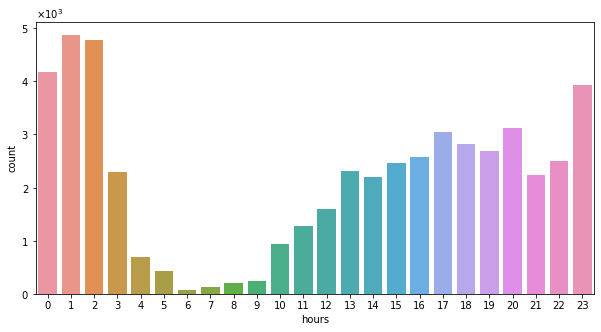

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x='hours', data=data).yaxis.set_major_formatter(formatter) 

In [8]:
data_by_date = data.groupby(['months', 'days']).count()
data_by_date

hours  names  timestamp
months days                         
August 1      1299   1299       1299
       2      1334   1334       1334
       3       398    398        398
       4       576    576        576
       5       358    358        358
...            ...    ...        ...
May    27      423    423        423
       28      541    541        541
       29      175    175        175
       30     1418   1418       1418
       31      434    434        434

[83 rows x 3 columns]

[Text(0.5, 1.0, 'Message Density of Each Day')]

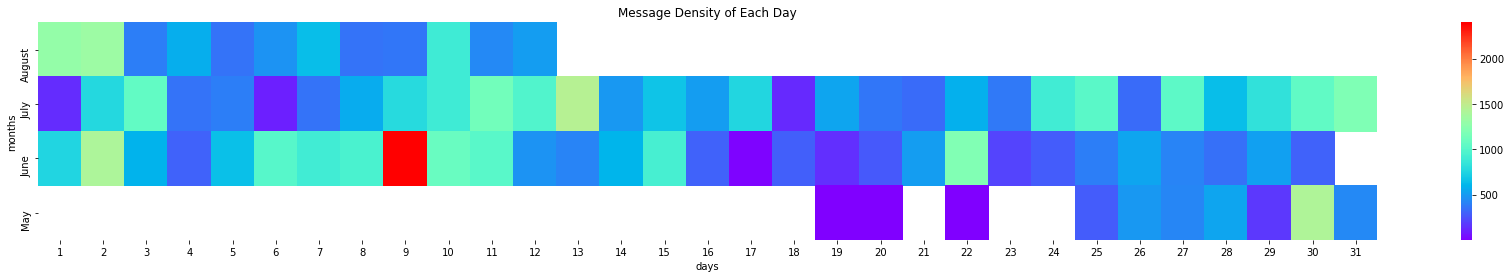

In [9]:
data_heat = data_by_date.pivot_table(values='hours', index='months', columns='days')
plt.figure(figsize=(30,4))
sns.heatmap(data_heat, cmap='rainbow').set(title='Message Density of Each Day')